# K-Means i inne algorytmy klastrowania danych: Krótkie wprowadzienie z językiem Python

http://www.kdnuggets.com/2017/03/k-means-clustering-algorithms-intro-python.html <br>
https://github.com/LearnDataSci/blog-post-resources/tree/master/Karate%20Club%20Clustering

## Wstęp

<p> W eksperymencie będziemy korzystali ze zbioru pod nazwą "Zachary’s Karate Club dataset". https://en.wikipedia.org/wiki/Zachary's_karate_club </p>
<p>Zbiór danych opracował Wayne W. Zachary i wykorzystywał do swoich badań w latach 1970-72. Założeniem do jego budowy zbioru danych jest sytuacja w klubie karate. Klub karate ma swojego administratora "John A" i instruktora "Mr. Hi". Nastąpił rozłam i uczniowe musieli się opowiedzieć za jednym z nich. W wyniku czego podzielili się na dwie grupy. Na rysunku uczniowe są widoczni jako węzły. </p>
<img src="./img/Social_Network_Model_of_Relationships_in_the_Karate_Club.png" style="width: 420px;"/>

### Przygotowanie środowiska programistycznego

<p>Podstawowymi pakietami wykorzystywanymi w ćwiczeniu są **sciki-learn** (import sklearn) i **networkx** (import networkx as nx). Dodatkowo będą potrzebne: **numpy**, **matplotlib**, **scipy**. Pakiet collections jest częścią jezyka Python i nie wymaga dodatkowego działania przed jej wykorzystaniem.</p>

### Dostęp do danych

In [102]:
%matplotlib inline

In [103]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import (KMeans, SpectralClustering, AgglomerativeClustering, affinity_propagation)
from sklearn.metrics.cluster import (normalized_mutual_info_score, adjusted_rand_score)
from collections import defaultdict

In [104]:
# Load and Store both data and groundtruth of Zachary's Karate Club
G = nx.karate_club_graph()
groundTruth = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]

In [105]:
def listToDict(list):
    listdict = {}

    for i in range(len(list)):
        listdict[i] = list[i]

    return listdict

In [106]:
def graphToEdgeMatrix(G):

    # Initialize Edge Matrix
    edgeMat = [[0 for x in range(len(G))] for y in range(len(G))]

    # For loop to set 0 or 1 ( diagonal elements are set to 1)
    for node in G:
        tempNeighList = G.neighbors(node)
        for neighbor in tempNeighList:
            edgeMat[node][neighbor] = 1
        edgeMat[node][node] = 1

    return edgeMat

In [107]:
def drawCommunities(G, partition, pos):
    # G is graph in networkx form
    # Partition is a dict containing info on clusters
    # Pos is base on networkx spring layout (nx.spring_layout(G))

    # For separating communities colors
    dictList = defaultdict(list)
    nodelist = []
    for node, com in partition.items():
        dictList[com].append(node)

    # Get size of Communities
    size = len(set(partition.values()))

    # For loop to assign communities colors
    for i in range(size):

        amplifier = i % 3
        multi = (i / 3) * 0.3

        red = green = blue = 0

        if amplifier == 0:
            red = 0.1 + multi
        elif amplifier == 1:
            green = 0.1 + multi
        else:
            blue = 0.1 + multi

        # Draw Nodes
        nx.draw_networkx_nodes(G, pos,
                               nodelist=dictList[i],
                               node_color=[0.0 + red, 0.0 + green, 0.0 + blue],
                               node_size=500,
                               alpha=0.8)

    # Draw edges and final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5)

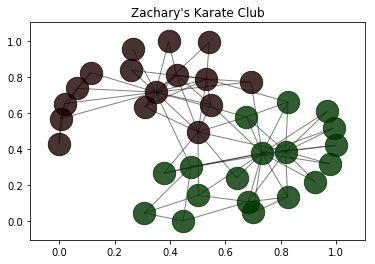

In [115]:
edgeMat = graphToEdgeMatrix(G)
results = []
nmiResults = []
arsResults = []

kClusters = 2 # k - the number of cluster

# K-means Clustering Model
partition = groundTruth
pos = nx.spring_layout(G)
drawCommunities(G, listToDict(partition), pos)

## K-Means Clustering

In [116]:
kmeans = KMeans(n_clusters=kClusters, n_init=200)
kmeans.fit(edgeMat)

# Transform our data to list form and store them in results list
results.append(list(kmeans.labels_))

## Spectral Clustering Model

In [117]:
spectral = SpectralClustering(n_clusters=kClusters, affinity="precomputed", n_init=200)
spectral.fit(edgeMat)

# Transform our data to list form and store them in results list
results.append(list(spectral.labels_))

## Agglomerative Clustering Model

In [118]:
agglomerative = AgglomerativeClustering(n_clusters=kClusters, linkage="ward")
agglomerative.fit(edgeMat)

# Transform our data to list form and store them in results list
results.append(list(agglomerative.labels_))

## Affinity Propagation Clustering Model

In [119]:
affinity = affinity_propagation(S=edgeMat, max_iter=200, damping=0.6)

# Transform our data to list form and store them in results list
results.append(list(affinity[1]))

---

## Append the results into lists

In [120]:
for x in results:
    nmiResults.append(normalized_mutual_info_score(groundTruth, x))
    arsResults.append(adjusted_rand_score(groundTruth, x))

## Code for plotting results

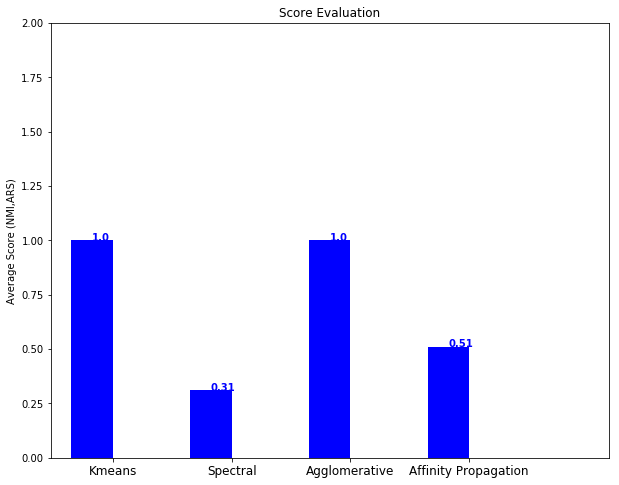

In [121]:
# Average of NMI and ARS
y = [sum(x) / 2 for x in zip(nmiResults, arsResults)]

xlabels = ['Kmeans', 'Spectral', 'Agglomerative', 'Affinity Propagation']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Set parameters for plotting
ind = np.arange(len(y))
width = 0.35

# Create barchart and set the axis limits and titles
ax.bar(ind, y, width, color='blue', error_kw=dict(elinewidth=2, ecolor='red'))
ax.set_xlim(-width, len(ind) + width)
ax.set_ylim(0, 2)
ax.set_ylabel('Average Score (NMI,ARS)')
ax.set_title('Score Evaluation')

# Add the xlabels to the chart
ax.set_xticks(ind + width / 2)
xtickNames = ax.set_xticklabels(xlabels)
plt.setp(xtickNames, fontsize=12)

# Add the actual value on top of each chart
for i, v in enumerate(y):
    ax.text(i, v, str(round(v, 2)), color='blue', fontweight='bold')

# Show the final plot
plt.show()